# Processamento Digital de Imagens

1001527 - Turma A

Prof. Cesar Henrique Comin

# Equalização Local de Histogramas

## Equipe
 Igor Teixeira Machado - RA: 769708

 Rafael Vinícius Passador - RA: 790036

## Introdução

Nesse notebook, observa-se a implementação da função de equalização global de histogramas, equalização adaptativa local de histogramas e da utilização, com fins comparativos, da função equalize_adapthist da biblioteca scikit-image.

A equação de equalização de histogramas é dada por:

\begin{equation}
s_k = T(k) = \frac{L-1}{MN}\sum_{j=0}^{k}n_j
\end{equation}

A função funciona dividindo a imagem em seções retangulares e calculando o histograma para cada seção. Em seguida, os valores de intensidade dos pixels são redistribuídos para melhorar o contraste e realçar os detalhes.

## Instalações necessárias


* pip install numpy
* python -m pip install -U matplotlib
* pip install opencv-python
* python -m pip install -U scikit-image

## Implementação

Importando bibliotecas necessárias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.exposure import equalize_adapthist

Equalização Global e Equalização Local de Histogramas

In [5]:
# Definicao das funcoes

def histogram_equalization(img):
    
    bins = range(0, 257)
    hist, _ = np.histogram(img, bins)    # Calcula quantos pixels possuem cada nível de intensidade

    # Calcula a transformação para cada nível de intensidade
    mn = sum(hist)
    c = 255./mn                           # O valor de (L-1)/MN
    out_intensity = np.zeros(256)
    for k in range(256):
        soma = 0
        for j in range(0, k+1):
            soma += hist[j]
        out_intensity[k] = c*soma
    
    # Aplica a transformação
    img_eq = np.zeros(img.shape)
    num_rows, num_cols = img.shape
    for row in range(num_rows):
        for col in range(num_cols):
            img_eq[row, col] = out_intensity[img[row, col]]
    
    return img_eq

def local_histogram_equalization(img, window_size=3):
    
    num_rows, num_cols = img.shape
    
    # Particionando as linhas e colunas
    partition_rows = num_rows // window_size
    partition_cols = num_cols // window_size

    #Criando uma imagem particionada de zeros
    image_partition = np.zeros((partition_rows + num_rows % window_size, partition_cols + num_cols % window_size), dtype=np.uint16)
    
    i = 0
    j = 0
    s = partition_rows
    f = partition_cols
    
    for row in range(i, s):
        for col in range(j, f):
            if f == partition_cols * window_size:
                f += num_cols % window_size
            
            #Aplicando a equalização global em cada partição
            if row == s - 1 and col == f - 1:
                image_partition = histogram_equalization(image_partition)
                img[i : s, j : f] = image_partition[i : s, j : f]
                s += partition_rows
                f += partition_cols
                i += partition_rows
                j += partition_cols

                if col == num_cols - 1:
                    break

            else:
                image_partition[row, col] = img[row, col]
        
        if s == partition_rows * window_size:
                s += num_rows % window_size
        if row == num_rows - 1:
                break
    
    return img


def draw_hist(x_axis, input, figsize):
    fig, ax = plt.subplots(figsize=figsize)
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


## Resultados 

(array([10251.,  6851.,  7189.,  6419.,  5318.,  5868.,  4803.,  5712.,
         4903.,  4268.,  4966.,  3720.,  3296.,  3200.,  3129.,  2831.,
         2717.,  2740.,  2775.,  2630.,  2933.,  2445.,  2470.,  2571.,
         2542.,  3230.,  3703.,  4019.,  3976.,  4294.,  4505.,  3408.,
         2610.,  2342.,  2071.,  1932.,  1764.,  1485.,  1499.,  1455.,
         1472.,  1179.,  1231.,  1304.,  1302.,  1511.,  1995.,  2847.,
         1697.,  2222.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

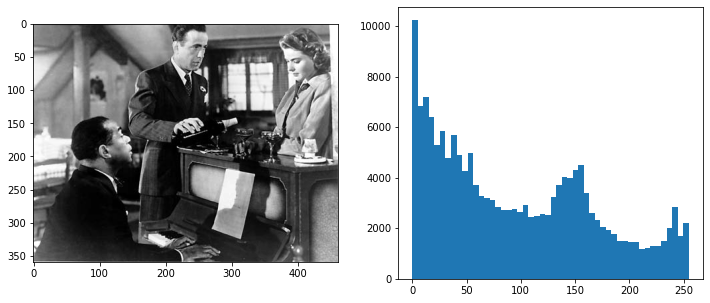

In [7]:
casablancaImg = cv2.imread('casablanca.tif', 0)

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(casablancaImg, 'gray')
plt.subplot(1, 2, 2)
plt.hist(casablancaImg.flatten(), 50)


(array([8519., 5644., 6455., 2996., 1622., 1315., 1127.,  981.,  802.,
         742.,  875.,  775.,  777.,  901.,  850.,  765.,  648.,  564.,
         573.,  589.,  711.,  569.,  507.,  504.,  535.,  545.,  531.,
         515.,  461.,  487.,  560.,  457.,  383.,  341.,  262.,  236.,
         190.,  200.,  158.,  167.,  198.,  163.,  182.,  155.,  115.,
          94.,   99.,   90.,  126.,  499.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

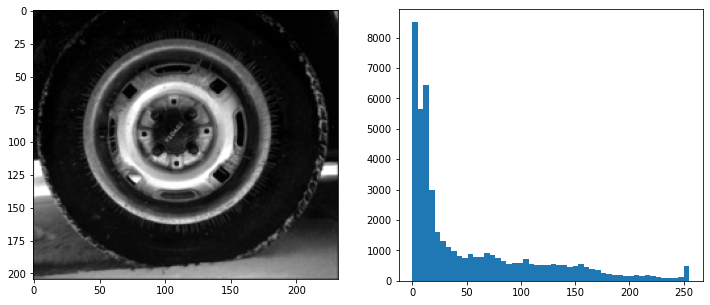

In [13]:
tire = cv2.imread('tire.tif', 0)

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(tire, 'gray')
plt.subplot(1, 2, 2)
plt.hist(tire.flatten(), 50)


(array([2.790e+02, 2.592e+03, 4.852e+03, 8.774e+03, 7.813e+03, 3.278e+03,
        2.112e+03, 1.075e+03, 7.350e+02, 8.270e+02, 7.870e+02, 6.670e+02,
        8.110e+02, 8.920e+02, 8.370e+02, 1.218e+03, 1.376e+03, 1.234e+03,
        1.795e+03, 2.038e+03, 1.717e+03, 2.178e+03, 2.068e+03, 1.593e+03,
        1.933e+03, 1.673e+03, 1.291e+03, 1.485e+03, 1.316e+03, 9.860e+02,
        1.167e+03, 1.144e+03, 8.810e+02, 1.102e+03, 1.083e+03, 8.280e+02,
        1.060e+03, 1.042e+03, 6.600e+02, 7.800e+02, 5.520e+02, 2.980e+02,
        2.230e+02, 1.340e+02, 8.300e+01, 4.800e+01, 4.000e+01, 1.600e+01,
        1.300e+01, 4.000e+00]),
 array([  6.  ,  10.66,  15.32,  19.98,  24.64,  29.3 ,  33.96,  38.62,
         43.28,  47.94,  52.6 ,  57.26,  61.92,  66.58,  71.24,  75.9 ,
         80.56,  85.22,  89.88,  94.54,  99.2 , 103.86, 108.52, 113.18,
        117.84, 122.5 , 127.16, 131.82, 136.48, 141.14, 145.8 , 150.46,
        155.12, 159.78, 164.44, 169.1 , 173.76, 178.42, 183.08, 187.74,
        192.4 , 

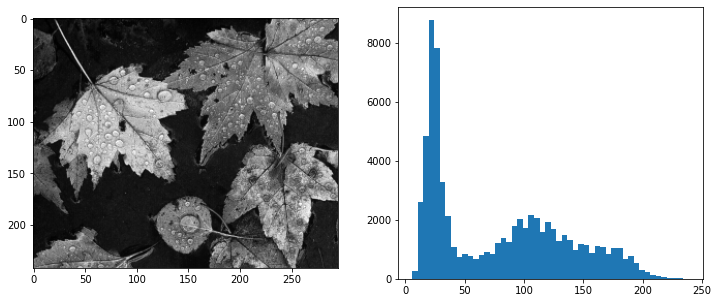

In [9]:
leaves = cv2.imread('leaves.tif', 0)

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(leaves, 'gray')
plt.subplot(1, 2, 2)
plt.hist(leaves.flatten(), 50)


(array([4741., 3607., 1903., 4477., 2374., 4282., 2907., 2791., 3628.,
        3187., 3256., 3594., 3138., 2814., 3254., 3564., 3797., 3423.,
        2614., 3971., 2946., 3296., 3200., 3129., 3372., 3318., 3254.,
        3209., 3473., 3444., 2996., 3588., 3230., 2910., 3161., 3208.,
        3263., 3450., 3798., 2752., 3493., 3269., 3556., 3249., 3202.,
        3411., 3103., 3232., 3378., 3388.]),
 array([  2.84719203,   7.89024819,  12.93330435,  17.97636051,
         23.01941667,  28.06247283,  33.10552899,  38.14858514,
         43.1916413 ,  48.23469746,  53.27775362,  58.32080978,
         63.36386594,  68.4069221 ,  73.44997826,  78.49303442,
         83.53609058,  88.57914674,  93.6222029 ,  98.66525906,
        103.70831522, 108.75137138, 113.79442754, 118.8374837 ,
        123.88053986, 128.92359601, 133.96665217, 139.00970833,
        144.05276449, 149.09582065, 154.13887681, 159.18193297,
        164.22498913, 169.26804529, 174.31110145, 179.35415761,
        184.39721377, 18

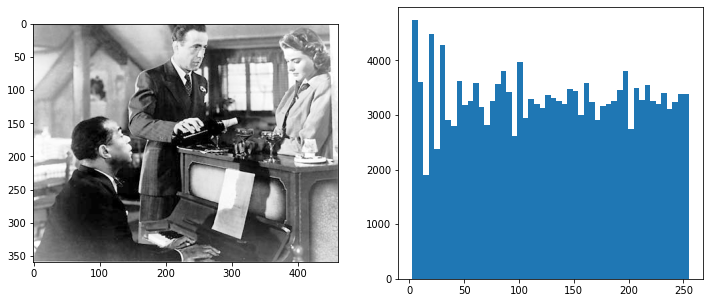

In [10]:
casablancaImgEq = histogram_equalization(casablancaImg)

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(casablancaImgEq, 'gray')
plt.subplot(1, 2, 2)
plt.hist(casablancaImgEq.flatten(), 50)


(array([10659.,  7223.,  7484.,  6767.,  5731.,  6139.,  4740.,  5372.,
         4802.,  4306.,  5063.,  3859.,  3445.,  3306.,  3235.,  2923.,
         2863.,  2762.,  2903.,  2540.,  2639.,  2146.,  2047.,  2062.,
         2104.,  2657.,  3103.,  3441.,  3285.,  3487.,  3804.,  3089.,
         2236.,  2340.,  2023.,  2257.,  1880.,  1864.,  1771.,  1710.,
         1813.,  1504.,  1395.,  1666.,  1533.,  1721.,  2149.,  3119.,
         2016.,  2617.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

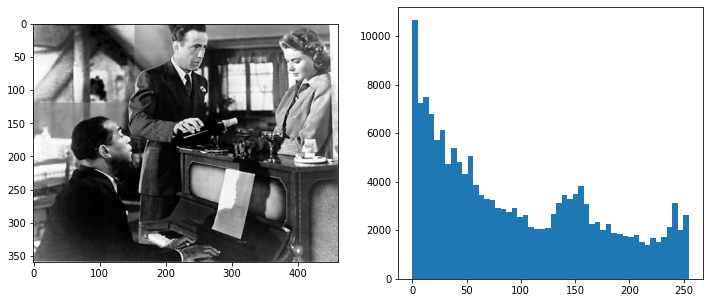

In [11]:
casablancaImgLocalEq = local_histogram_equalization(casablancaImg)

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(casablancaImgLocalEq, 'gray')
plt.subplot(1, 2, 2)
plt.hist(casablancaImgLocalEq.flatten(), 50)


(array([5257., 4864., 5456., 5406., 4869., 4593., 4251., 3979., 4029.,
        3874., 4007., 4209., 4326., 4130., 3615., 3456., 3345., 3333.,
        3106., 2959., 3042., 2955., 2864., 2874., 2963., 2940., 2888.,
        2850., 2872., 3073., 3119., 3160., 3214., 3062., 3012., 2798.,
        2637., 2633., 2609., 2366., 2348., 2301., 2212., 2390., 2521.,
        2311., 2295., 2619., 2556., 3052.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

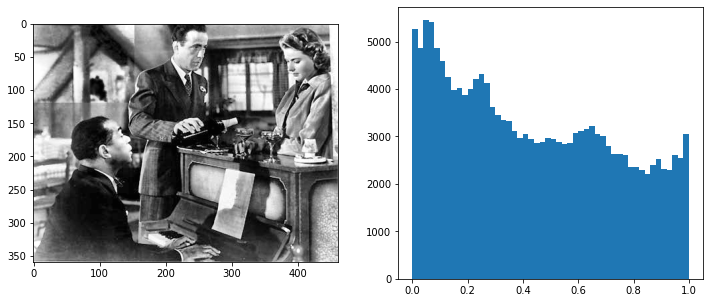

In [12]:
casablancaScikitLocalEq = equalize_adapthist(casablancaImg)

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(casablancaScikitLocalEq, 'gray')
plt.subplot(1, 2, 2)
plt.hist(casablancaScikitLocalEq.flatten(), 50)


(array([ 477., 1871.,    0.,    0., 2053.,    0., 1848., 1198., 1072.,
        1062., 1052., 1086.,    0., 1122., 1322.,    0., 1513., 1498.,
           0., 1320., 1098., 1026.,  848., 1299., 1229.,  919.,  856.,
        1011.,  898.,  981.,  964.,  872.,  886., 1098.,  870.,  861.,
        1074.,  976.,  911.,  936.,  890.,  930.,  964.,  938.,  962.,
         917.,  976.,  988.,  931.,  957.]),
 array([  2.55750631,   7.60635618,  12.65520606,  17.70405593,
         22.7529058 ,  27.80175568,  32.85060555,  37.89945542,
         42.9483053 ,  47.99715517,  53.04600505,  58.09485492,
         63.14370479,  68.19255467,  73.24140454,  78.29025442,
         83.33910429,  88.38795416,  93.43680404,  98.48565391,
        103.53450378, 108.58335366, 113.63220353, 118.68105341,
        123.72990328, 128.77875315, 133.82760303, 138.8764529 ,
        143.92530278, 148.97415265, 154.02300252, 159.0718524 ,
        164.12070227, 169.16955214, 174.21840202, 179.26725189,
        184.31610177, 18

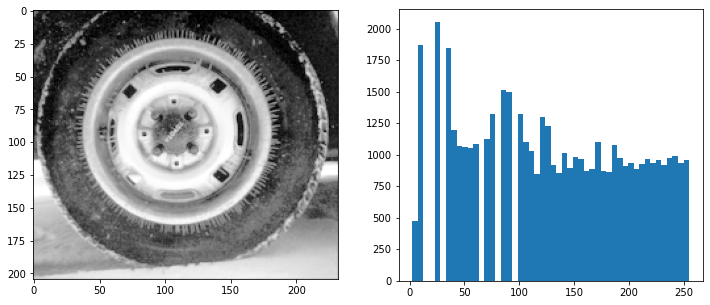

In [14]:
tireGlobalEq = histogram_equalization(tire)

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(tireGlobalEq, 'gray')
plt.subplot(1, 2, 2)
plt.hist(tireGlobalEq.flatten(), 50)


(array([5974., 4551., 6124., 2799., 1481., 1208., 1633.,  917.,  755.,
         702.,  837.,  753., 1400.,  860.,  811.,  726.,  581., 1063.,
         553.,  571.,  696.,  969.,  501.,  489.,  523.,  903.,  525.,
         770.,  447.,  472.,  817.,  446.,  629.,  339.,  431.,  361.,
         290.,  340.,  249.,  293.,  320.,  269.,  273.,  267.,  215.,
         200.,  200.,  194.,  231.,  602.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

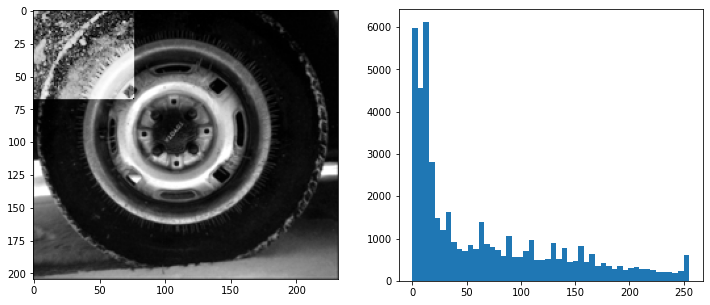

In [15]:
tirelocalEq = local_histogram_equalization(tire)

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(tirelocalEq, 'gray')
plt.subplot(1, 2, 2)
plt.hist(tirelocalEq.flatten(), 50)

(array([3315., 2635., 3085., 3608., 3079., 2274., 1535., 1126.,  864.,
         855.,  861., 1151.,  799.,  764.,  749.,  869.,  923.,  756.,
         648.,  826.,  727.,  643.,  758.,  668.,  678.,  709.,  675.,
         671.,  605.,  634.,  659.,  625.,  663.,  621.,  647.,  646.,
         567.,  543.,  624.,  537.,  521.,  469.,  406.,  339.,  318.,
         288.,  294.,  298.,  314.,  691.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

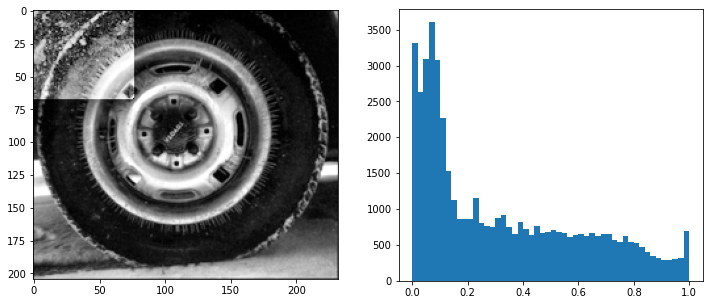

In [16]:
tireScikitLocalEq = equalize_adapthist(tire)


plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(tireScikitLocalEq, 'gray')
plt.subplot(1, 2, 2)
plt.hist(tireScikitLocalEq.flatten(), 50)

(array([1259.,  784., 1975., 1246., 1107., 1352., 1672., 1883.,    0.,
        1965., 1602., 1652., 2039.,    0., 1852., 1553., 1398., 1856.,
        1731., 1230., 1767., 1406., 1491., 1434., 1432., 1329., 1322.,
        1510., 1347., 1561., 1237., 1308., 1671., 1312., 1672., 1191.,
        1583., 1430., 1341., 1565., 1419., 1276., 1392., 1616., 1338.,
        1503., 1483., 1247., 1503., 1548.]),
 array([3.57192884e-03, 5.10350049e+00, 1.02034291e+01, 1.53033576e+01,
        2.04032862e+01, 2.55032147e+01, 3.06031433e+01, 3.57030719e+01,
        4.08030004e+01, 4.59029290e+01, 5.10028575e+01, 5.61027861e+01,
        6.12027147e+01, 6.63026432e+01, 7.14025718e+01, 7.65025004e+01,
        8.16024289e+01, 8.67023575e+01, 9.18022860e+01, 9.69022146e+01,
        1.02002143e+02, 1.07102072e+02, 1.12202000e+02, 1.17301929e+02,
        1.22401857e+02, 1.27501786e+02, 1.32601715e+02, 1.37701643e+02,
        1.42801572e+02, 1.47901500e+02, 1.53001429e+02, 1.58101357e+02,
        1.63201286e+02, 

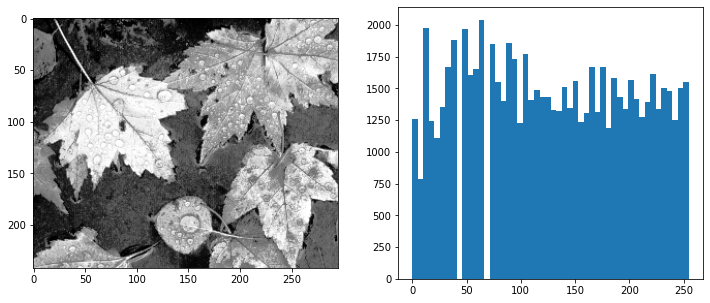

In [17]:
leavesGlobalEq = histogram_equalization(leaves)

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(leavesGlobalEq, 'gray')
plt.subplot(1, 2, 2)
plt.hist(leavesGlobalEq.flatten(), 50)

(array([ 133.,  238., 1886., 4787., 7480., 6359., 3321., 1350., 1046.,
         723., 1196.,  726.,  747., 1188.,  994., 1578., 1408., 1598.,
        2336., 2080., 2531., 2570., 1958., 1882., 2080., 1557., 1679.,
        1225., 1375., 1282., 1491., 1104., 1144., 1168., 1146., 1117.,
         961.,  836.,  656.,  457.,  381.,  248.,  210.,  193.,  161.,
         174.,  151.,  170.,  153.,  156.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

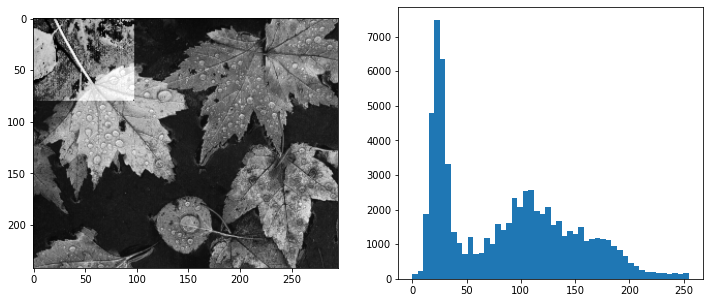

In [18]:
leavesLocalEq = local_histogram_equalization(leaves)

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(leavesLocalEq, 'gray')
plt.subplot(1, 2, 2)
plt.hist(leavesLocalEq.flatten(), 50)

(array([ 169.,  865., 1672., 2375., 3427., 4581., 4505., 3688., 2714.,
        1737., 1500., 1205., 1152.,  994., 1084., 1027., 1094., 1176.,
        1258., 1414., 1312., 1498., 1434., 1586., 1557., 1602., 1481.,
        1430., 1403., 1357., 1410., 1366., 1330., 1285., 1266., 1294.,
        1212., 1125., 1174., 1140., 1035.,  955.,  829.,  793.,  650.,
         589.,  473.,  392.,  365.,  410.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

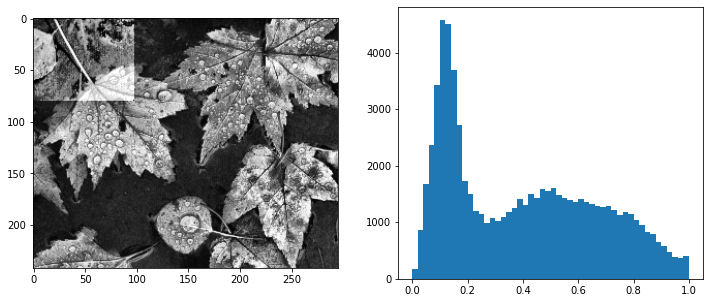

In [19]:
leavesScikitLocalEq = equalize_adapthist(leaves)

plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.imshow(leavesScikitLocalEq, 'gray')
plt.subplot(1, 2, 2)
plt.hist(leavesScikitLocalEq.flatten(), 50)